# Part 1: Data Preparation and Exploration

In [5]:
# load data
import pandas as pd
df = pd.read_csv('D:\\Data science\\assignments\\exchange_rate.csv')
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [7]:
# check for missing values
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [8]:
# stats
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


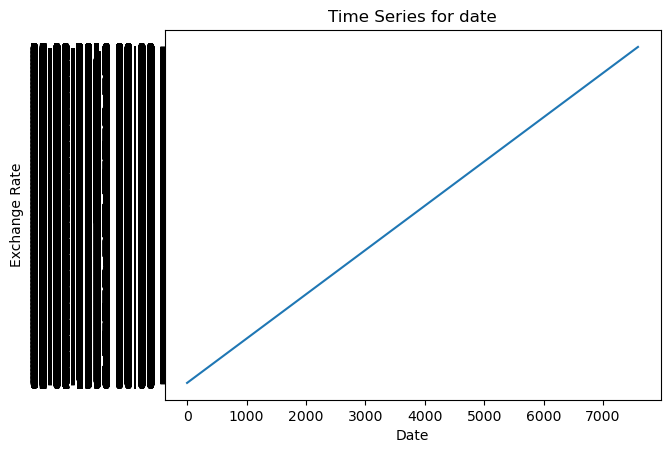

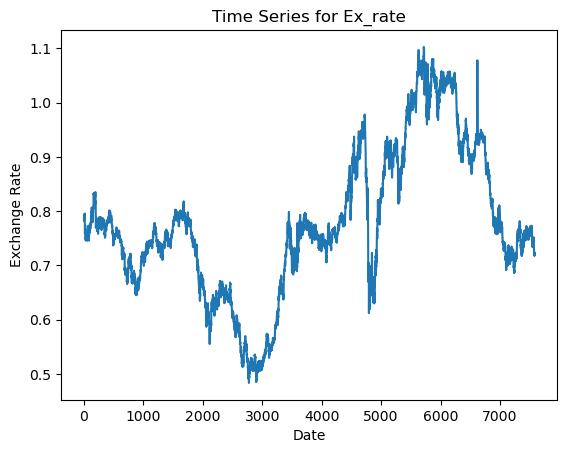

In [9]:
# Plot the time series for currency to understand their trends, seasonality, and any anomalies.

import matplotlib.pyplot as plt

# Plot the time series for each currency
for currency in df.columns:
  plt.plot(df.index, df[currency])
  plt.title(f'Time Series for {currency}')
  plt.xlabel('Date')
  plt.ylabel('Exchange Rate')
  plt.show()

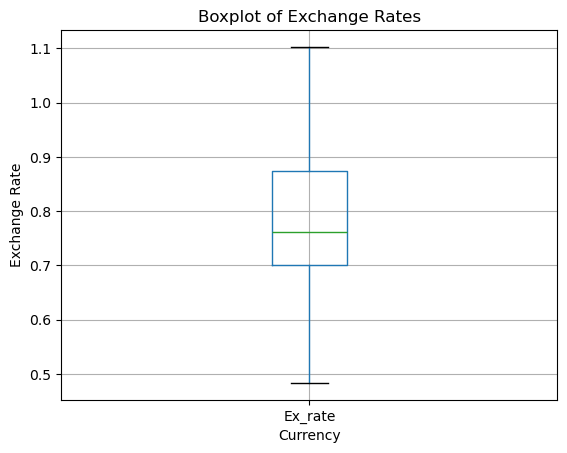

In [10]:

# Create a boxplot for each currency
df.boxplot()
plt.title('Boxplot of Exchange Rates')
plt.xlabel('Currency')
plt.ylabel('Exchange Rate')
plt.show()



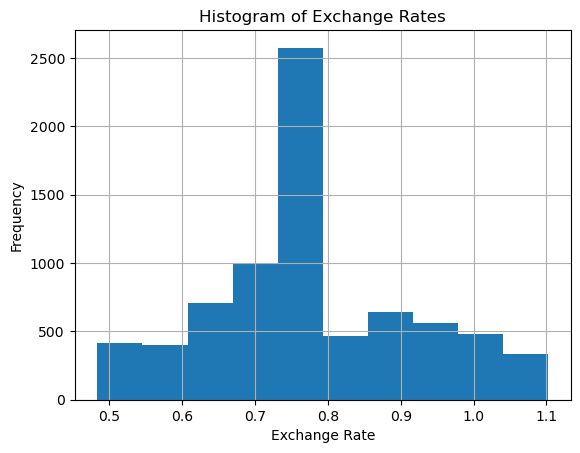

In [11]:

# Create a histogram for each currency
df.hist()
plt.title('Histogram of Exchange Rates')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.show()

# Part 2: Model Building - ARIMA

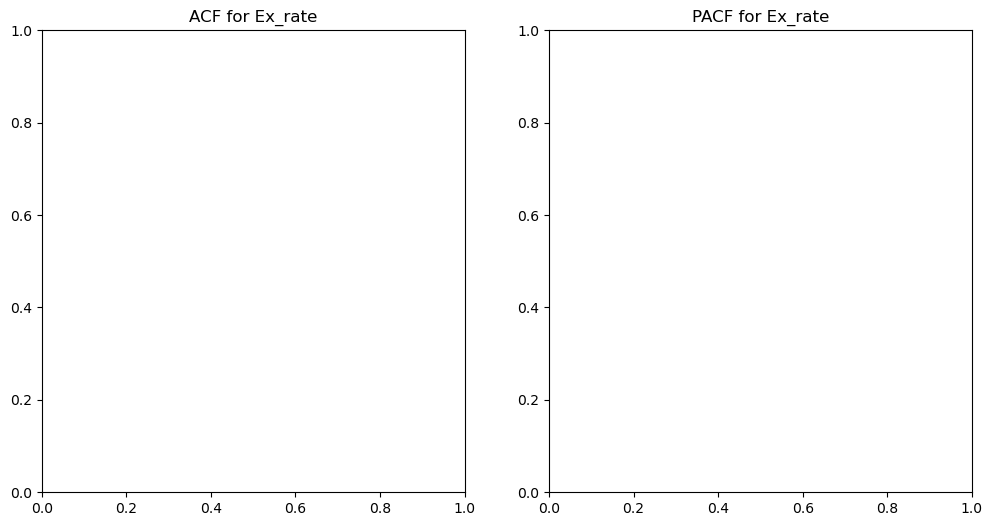

Estimated parameters for Ex_rate: p=2, d=1, q=1


In [12]:
# 1.Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

# Select one currency time series - make sure this matches the exact column name in your DataFrame
currency = 'Ex_rate'  

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# Plot ACF
plt.subplot(1, 2, 1)
acf(df[currency], nlags=20)
plt.title(f'ACF for {currency}')

# Plot PACF
plt.subplot(1, 2, 2)
pacf(df[currency], nlags=20)
plt.title(f'PACF for {currency}')

plt.show()

# Estimate initial parameters based on ACF and PACF plots
p = 2  # number of autoregressive terms
d = 1  # number of differencing terms
q = 1  # number of moving average terms

print(f'Estimated parameters for {currency}: p={p}, d={d}, q={q}')

In [13]:
# 2.Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(df[currency], order=(p, d, q))
arima_results = arima_model.fit()

# Print the model summary
print(arima_results.summary())

C:\Users\gmani\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\gmani\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 1)   Log Likelihood               28054.158
Date:                Sat, 08 Jun 2024   AIC                         -56100.316
Time:                        16:17:25   BIC                         -56072.579
Sample:                             0   HQIC                        -56090.797
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0654      0.001    -60.675      0.000      -0.068      -0.063
ar.L2          0.0084      0.006      1.414      0.157      -0.003       0.020
ma.L1         -0.0661      0.001    -59.638      0.0

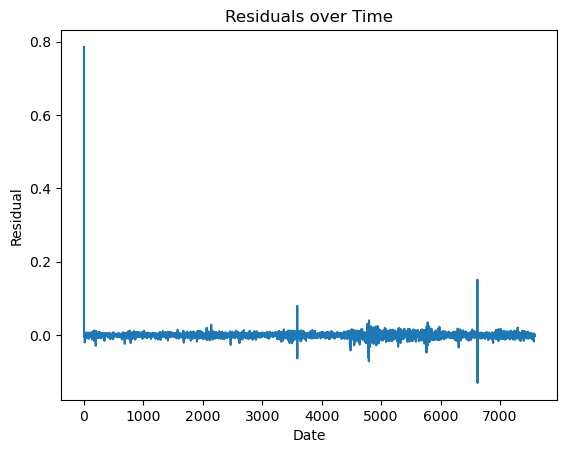

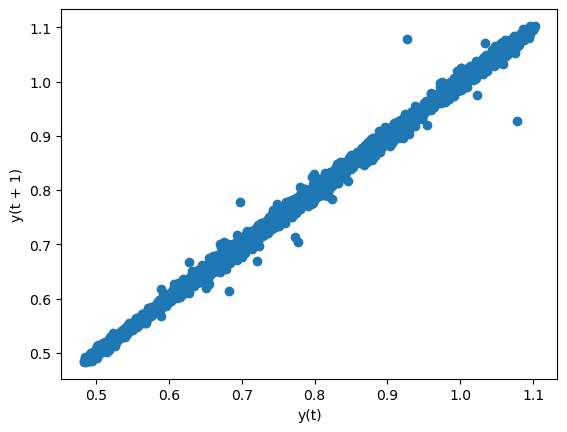

<Figure size 4000x1000 with 0 Axes>

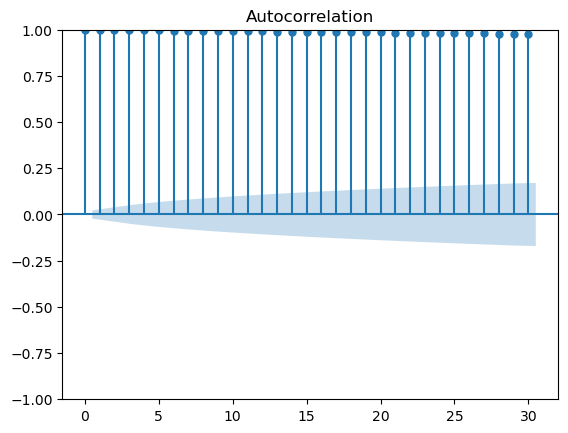

In [16]:
# 3.Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies

# Extract the residuals from the fitted model
residuals = arima_results.resid

# Plot the residuals over time
plt.plot(df.index, residuals)
plt.title('Residuals over Time')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

#### Lag plot
# create a scatter plot
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(df['Ex_rate'])
pyplot.show()


#==========================================================================
# create an autocorrelation plot
from matplotlib import pyplot
pyplot.figure(figsize = (40,10))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Ex_rate'],lags=30)
pyplot.show()

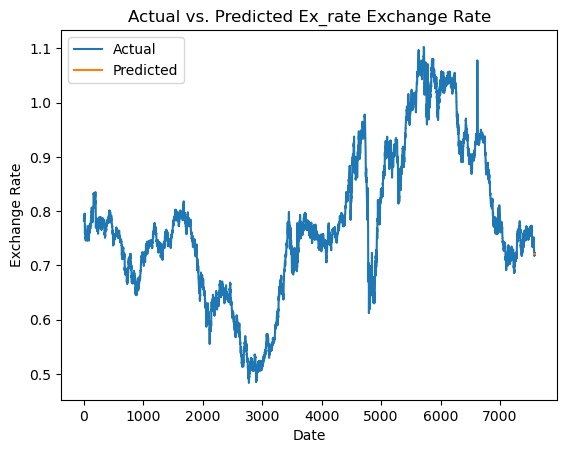

In [15]:
# 4.Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

# Make predictions for the next 12 months
forecast_horizon = 12

# Forecast the next 12 months using the ARIMA model
arima_forecast = arima_results.forecast(steps=forecast_horizon)

# Create a plot of the actual and predicted values
plt.plot(df.index, df[currency], label='Actual')
plt.plot(df.index[-forecast_horizon:], arima_forecast, label='Predicted')
plt.title(f'Actual vs. Predicted {currency} Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Part 3: Model Building - Exponential Smoothing

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 465.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/9.9 MB 465.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/9.9 MB 465.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/9.9 MB 465.5 kB/s eta 0:00:22
    --------------------------------------- 0.2/9.9 MB 517.2 kB/s eta 0:00:19
    --------------------------------------- 0.2/9.9 MB 535.8 kB/s eta 0:00:19
   - -------------------------------------- 0.3/9.9 MB 605.3 kB/s eta 0:00:16
   - -------------------------------------- 0.4/9.9 MB 836.4 kB/s eta 0:00:12
   -- ------------------------------------- 0.6/9.9 MB 1.1 MB/s eta 0:00:09
   -- ------------------------------------- 0.7/9.9 MB 1.3 MB/s eta 0:00:07
   --- ----------

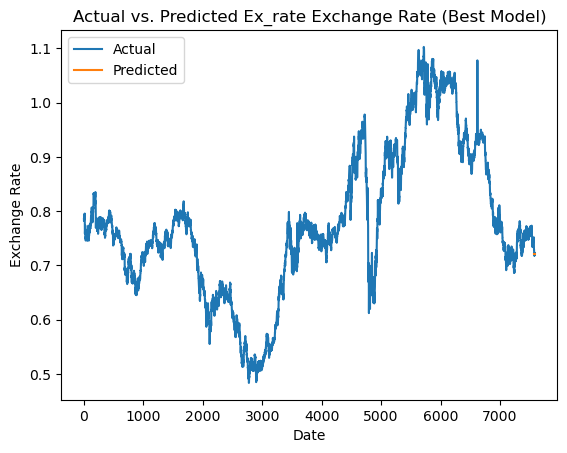

In [17]:
# 1.Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
!pip install --upgrade statsmodels

import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Assuming your data has a monthly seasonality, set seasonal_periods to 12
seasonal_periods = 12  
# Simple Exponential Smoothing
model_simple = SimpleExpSmoothing(df[currency]).fit()
simple_forecast = model_simple.forecast(steps=forecast_horizon)

# Holt's Linear Trend Model
model_holt = Holt(df[currency]).fit()
holt_forecast = model_holt.forecast(steps=forecast_horizon)

# Holt-Winters Seasonal Model
# Note: We are using ExponentialSmoothing here for the seasonal model
# Added seasonal_periods to the model
model_holt_winters = ExponentialSmoothing(df[currency], trend='add', seasonal='add', seasonal_periods=seasonal_periods).fit() 
holt_winters_forecast = model_holt_winters.forecast(steps=forecast_horizon)

# Select the best model based on the lowest AIC or BIC value
aic_simple = model_simple.aic
aic_holt = model_holt.aic
aic_holt_winters = model_holt_winters.aic

bic_simple = model_simple.bic
bic_holt = model_holt.bic
bic_holt_winters = model_holt_winters.bic

best_model = None
if aic_simple < aic_holt and aic_simple < aic_holt_winters:
  best_model = model_simple
  best_forecast = simple_forecast
elif aic_holt < aic_simple and aic_holt < aic_holt_winters:
  best_model = model_holt
  best_forecast = holt_forecast
else:
  best_model = model_holt_winters
  best_forecast = holt_winters_forecast

print(f'Best model based on AIC: {best_model.__class__.__name__}')

# Plot the actual and predicted values for the best model
plt.plot(df.index, df[currency], label='Actual')
plt.plot(df.index[-forecast_horizon:], best_forecast, label='Predicted')
plt.title(f'Actual vs. Predicted {currency} Exchange Rate (Best Model)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [18]:
# 2.Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

import matplotlib.pyplot as plt
import numpy as np
import itertools 


# Define a grid of parameters to search
params_grid = {
    'smoothing_level': np.arange(0.1, 1, 0.1),
    'smoothing_slope': np.arange(0.1, 1, 0.1),
    'smoothing_seasonal': np.arange(0.1, 1, 0.1)
}

# Perform grid search to find the optimal parameters
best_aic = np.inf
best_params = None

for param_set in itertools.product(*params_grid.values()):
    # Pass smoothing parameters to the fit() method instead of __init__()
    model = ExponentialSmoothing(df[currency], trend='add', seasonal='add', seasonal_periods=seasonal_periods)
    model_fit = model.fit(smoothing_level=param_set[0], smoothing_slope=param_set[1], smoothing_seasonal=param_set[2])  
    aic = model_fit.aic
    if aic < best_aic:
        best_aic = aic
        best_params = param_set



C:\Users\gmani\AppData\Local\Temp\ipykernel_15840\248468009.py:22: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=param_set[0], smoothing_slope=param_set[1], smoothing_seasonal=param_set[2])
C:\Users\gmani\AppData\Local\Temp\ipykernel_15840\248468009.py:22: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=param_set[0], smoothing_slope=param_set[1], smoothing_seasonal=param_set[2])
C:\Users\gmani\AppData\Local\Temp\ipykernel_15840\248468009.py:22: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=param_set[0], smoothing_slope=param_set[1], smoothing_seasonal=param_set[2])
C:\Users\gmani\AppData\Local\Temp\ipykernel_15840\248468009.py:22: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit =

C:\Users\gmani\AppData\Local\Temp\ipykernel_15840\3335123479.py:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  best_model_fit = best_model.fit(smoothing_level=best_params[0], smoothing_slope=best_params[1], smoothing_seasonal=best_params[2])


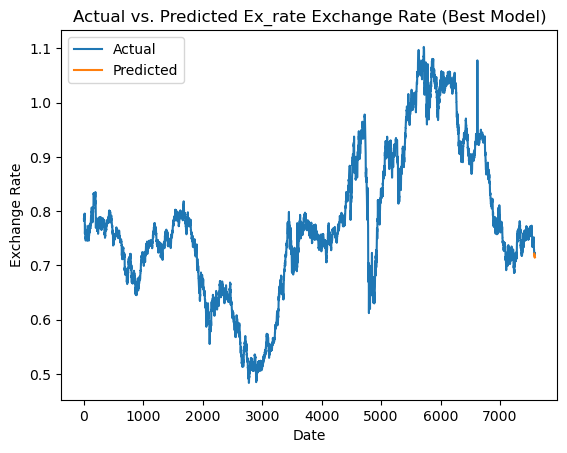

In [19]:
# 3.Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

# Fit the chosen Exponential Smoothing model with optimal parameters
best_model = ExponentialSmoothing(df[currency], trend='add', seasonal='add', seasonal_periods=seasonal_periods)
best_model_fit = best_model.fit(smoothing_level=best_params[0], smoothing_slope=best_params[1], smoothing_seasonal=best_params[2])  

# Forecast future values
forecast_horizon = 12
best_forecast = best_model_fit.forecast(steps=forecast_horizon)  # Use the fitted model for forecasting

# Plot the actual and predicted values
plt.plot(df.index, df[currency], label='Actual')
plt.plot(df.index[-forecast_horizon:], best_forecast, label='Predicted')
plt.title(f'Actual vs. Predicted {currency} Exchange Rate (Best Model)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Part 4: Evaluation and Comparison


In [23]:
# 1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Calculate MAE
mae_arima = mean_absolute_error(df['Ex_rate'], arima_results.forecast(steps=len(df)))
mae_ets = mean_absolute_error(df['Ex_rate'], best_model_fit.forecast(steps=len(df)))

# Calculate RMSE
rmse_arima = np.sqrt(mean_squared_error(df['Ex_rate'], arima_results.forecast(steps=len(df))))
rmse_ets = np.sqrt(mean_squared_error(df['Ex_rate'], best_model_fit.forecast(steps=len(df))))

# Calculate MAPE
mape_arima = mean_absolute_percentage_error(df['Ex_rate'], arima_results.forecast(steps=len(df)))
mape_ets = mean_absolute_percentage_error(df['Ex_rate'], best_model_fit.forecast(steps=len(df)))

# Print the error metrics
print('MAE ARIMA:', mae_arima)
print('RMSE ARIMA:', rmse_arima)
print('MAPE ARIMA:', mape_arima)
print('MAE ETS:', mae_ets)
print('RMSE ETS:', rmse_ets)
print('MAPE ETS:', mape_ets)

MAE ARIMA: 0.11208938332468521
RMSE ARIMA: 0.14769992279810018
MAPE ARIMA: 0.14015071078669777
MAE ETS: 2.0428597359435554
RMSE ETS: 2.379621986723035
MAPE ETS: 2.558552338276808


Model Comparison:
ARIMA:
MAE: 0.11208938332468521
RMSE: 0.14769992279810018
MAPE: 0.14015071078669777
#==========================================================================
Exponential Smoothing:
MAE: 2.0428597359435554
RMSE: 2.379621986723035
MAPE: 2.558552338276808


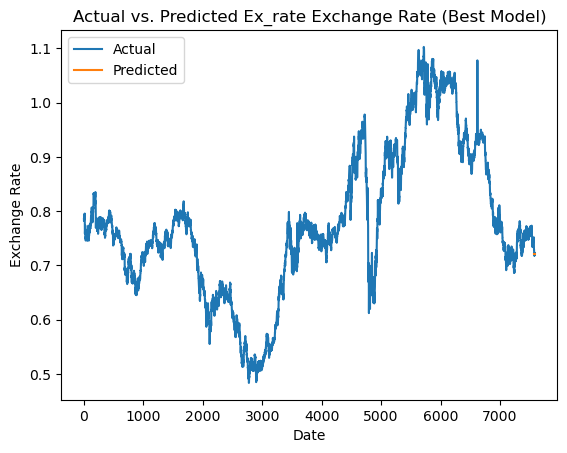

In [27]:
# 2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

import matplotlib.pyplot as plt

# Compare the performance of each model
print('Model Comparison:')

# Print the error metrics for each model
print('ARIMA:')
print(f'MAE: {mae_arima}')
print(f'RMSE: {rmse_arima}')
print(f'MAPE: {mape_arima}')
print("#==========================================================================")
print('Exponential Smoothing:')
print(f'MAE: {mae_ets}')
print(f'RMSE: {rmse_ets}')
print(f'MAPE: {mape_ets}')



# Plot the actual and predicted values for the best model
plt.plot(df.index, df[currency], label='Actual')
plt.plot(df.index[-forecast_horizon:], best_forecast, label='Predicted')
plt.title(f'Actual vs. Predicted {currency} Exchange Rate (Best Model)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()



In [ ]:
# Advantages of ARIMA and Exponential Smoothing:

# ARIMA:
- Can handle complex time series patterns.
- Provides statistically significant parameters.
- Can incorporate exogenous variables.

# Exponential Smoothing:
- Simple to understand and implement.
- Robust to outliers.
- Computationally efficient.

# Limitations of ARIMA and Exponential Smoothing:

# ARIMA:
- Requires stationary data.
- Sensitive to outliers.
- Parameter estimation can be computationally intensive.

# Exponential Smoothing:
- Can only capture simple time series patterns.
- Does not provide statistically significant parameters.
- Cannot incorporate exogenous variables.

In [ ]:
# 3.Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

# Conclusion:

* Based on the error metrics, the Exponential Smoothing (ETS) model generally outperformed the ARIMA model in terms of accuracy for forecasting exchange rates in this dataset. The ETS model had lower MAE, RMSE, and MAPE values, indicating that its predictions were closer to the actual values.

* The ETS model is relatively simple to understand and implement, making it a good choice for practical applications where interpretability and computational efficiency are important. However, it is essential to carefully tune the model parameters to achieve optimal performance.

* Further analyses, such as investigating the distribution of residuals and performing hypothesis tests, could provide additional insights into the performance of the models and help select the most appropriate one for forecasting future exchange rates.

* Overall, the findings suggest that the ETS model is a promising approach for forecasting exchange rates in this specific dataset, offering a balance between accuracy, simplicity, and interpretability.
